In [5]:
import numpy as np
import time
import copy
import random
import typing

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.special import erfc

from vibrating_string import VibratingString
from visualisation import create_animation_vibstring, vibrating_string_graphs
from visualisation import compare_analytic_solutions
from visualisation import compare_numerical_methods
from visualisation import compare_iterative_methods
from visualisation import tolerances_comparison
from visualisation import optimal_omega
from visualisation import plot_omega_vs_N
from mask_method import run_experiments_on_mask

This Python Notebook helps visualize and run the neccesary code for Assignment 1 of Scientific Computing.

The following variables set the initial conditions to be used throughout the code.

In [2]:

N = 50                  # Number of grid points in each dimension (50x50 grid)
L = 1.0                 # Length of the domain (1.0 unit)
dx = L / N              # Grid spacing (distance between grid points)
D = 1.0                 # Diffusion coefficient (controls the rate of diffusion)
dt = 0.25 * dx**2 / D   # Time step size based on stability criteria
T = 1.0                 # Total simulation time
c = 1.0
timesteps = [0, 0.1, 0.25, 0.5, 0.7]

### Vibrating String

In [ ]:
def initial_condition1(x, L, N):
    return np.sin(2*np.pi*x)

def initial_condition2(x, L, N):
    return np.sin(5*np.pi*x)

def initial_condition3(x, L, N):
    if (0.2*L < x*N < 0.4*L):
        return np.sin(5*np.pi*x)
    else:
        return 0

In [ ]:
L = 1.0
N = 1000
c = 1.0
T = 1.0

displacement_func = initial_condition1
vib_string = VibratingString(displacement_func, L, T, N, c)
vib_string.u = vib_string.stepping_method(vib_string.u)
fig, ax = vibrating_string_graphs(vib_string, timesteps = [0, 100, 250, 500, 700])

displacement_func = initial_condition2
vib_string2 = VibratingString(displacement_func, L, T, N, c)
vib_string2.u = vib_string2.stepping_method(vib_string2.u)
fig, ax = vibrating_string_graphs(vib_string2, timesteps = [0, 100, 250, 500, 700])

displacement_func = initial_condition3
vib_string3 = VibratingString(displacement_func, L, T, N, c)
vib_string3.u = vib_string2.stepping_method(vib_string3.u)
fig, ax = vibrating_string_graphs(vib_string3, timesteps = [0, 100, 250, 500, 700])

### Animated plots
The animated plots are run and saved in the results folder.

In [ ]:
# Generate an animation
ani = create_animation_vibstring(vib_string1)
ani.save('diffusion_animation_str1.gif', writer='pillow', fps=15)
ani = create_animation_vibstring(vib_string2)
ani.save('diffusion_animation_str2.gif', writer='pillow', fps=15)
ani = create_animation_vibstring(vib_string3)
ani.save('diffusion_animation_str3.gif', writer='pillow', fps=15)

1.D, 1.E and 1.F, 1.G: 

In [7]:
# Simulation parameters
N = 50      # Number of grid points (must be square grid for provided update function)
L = 1.0   # Domain size
dx= L/(N-1)  # Grid spacing
D = 1.0              # Diffusion coefficient

# # Stability-limited time step
dt = 0.24 * dx**2 / D  
T = 1.0   

compare_analytic_solutions(N, L, D, dx, dt, T, method = 'Jacobi')
compare_analytic_solutions(N, L, D, dx, dt, T, method = 'Gauss')
compare_analytic_solutions(N, L, D, dx, dt, T, method = 'SOR')

Converged after 4067 iterations


TypeError: 'int' object is not subscriptable

### 1.H Comparing different Numerical Methods with Analytical Solution
Successive Over Relaxation requires least amount of iterations $(424)$ to converge at the solution followed by Gauss-Seidel $(2406)$ and Jacobi $(4067)$ Iteration Methods 

In [ ]:
compare_numerical_methods(N, D, dx, dt, T, L, methods=['Jacobi'])
compare_numerical_methods(N, D, dx, dt, T, L, methods=['Gauss-Seidel'])
compare_numerical_methods(N, D, dx, dt, T, L, methods=['SOR'], omega=1.8)

### 1.I Showing how convergence mesasure depends on the number of iterations $k$

In [ ]:
compare_iterative_methods(N, D, dx, dt, T, tol=1e-5)

Please note that the function below may run for several minutes.

In [ ]:
tol_values = np.logspace(-5, -12, 5)
tolerances_comparison(N, D, dx, dt, T, tol_values)

### 1.J Finding Optimal $(\omega)$ for minimum number of Iterations in the SOR Method

In [ ]:
omega_list = np.linspace(1.8, 1.90, 20)
optimal_omega(N, D, dx, dt, T, tol=1e-5, omega_list= omega_list)

Please note that the code below may run for several minutes.

In [ ]:
# Example parameters for running the function
N_values = [10, 30, 50, 100]


plot_omega_vs_N(N_values, D, dt, T)

### 1.K Implementing Sinks in the Grid


Running simulation with mask at (0.75, 0.5), ω=1.5
Converged after 621 iterations


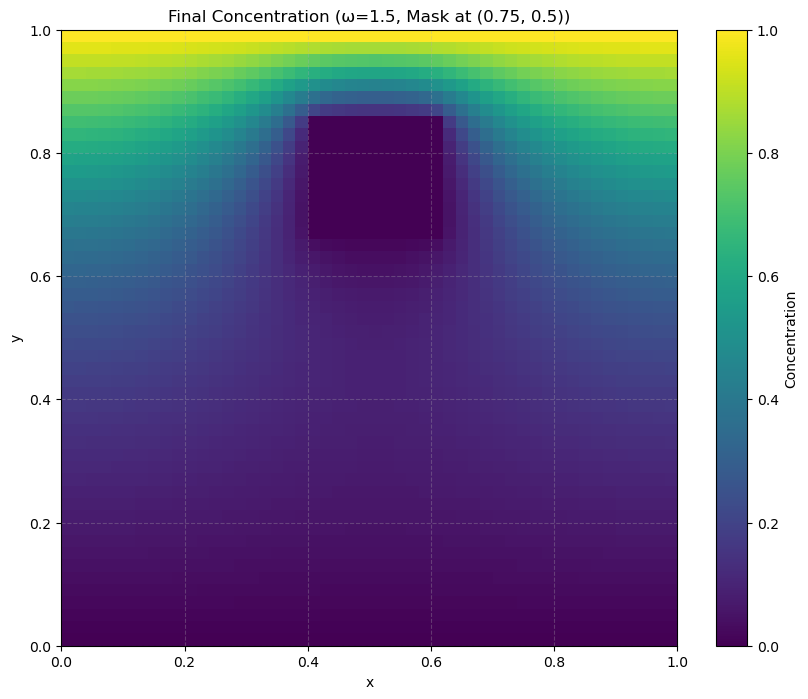


Running simulation with mask at (0.75, 0.5), ω=1.5285714285714285
Converged after 586 iterations

Running simulation with mask at (0.75, 0.5), ω=1.5571428571428572
Converged after 551 iterations

Running simulation with mask at (0.75, 0.5), ω=1.5857142857142856
Converged after 516 iterations

Running simulation with mask at (0.75, 0.5), ω=1.6142857142857143
Converged after 482 iterations

Running simulation with mask at (0.75, 0.5), ω=1.6428571428571428
Converged after 449 iterations

Running simulation with mask at (0.75, 0.5), ω=1.6714285714285713
Converged after 416 iterations

Running simulation with mask at (0.75, 0.5), ω=1.7
Converged after 384 iterations

Running simulation with mask at (0.75, 0.5), ω=1.7285714285714284
Converged after 352 iterations

Running simulation with mask at (0.75, 0.5), ω=1.7571428571428571
Converged after 320 iterations

Running simulation with mask at (0.75, 0.5), ω=1.7857142857142856
Converged after 289 iterations

Running simulation with mask at (0

NameError: name 'plot_iterations' is not defined

In [3]:
run_experiments_on_mask(N, D, dx, T, dt)